# plotting

> Set of functions and classes to make plotting easier

In [ ]:
#| default_exp plotting

In [ ]:
#| hide
from eccore.ipython import nb_setup
from nbdev.showdoc import show_doc
from ecfintools.core import load_test_df

In [ ]:
#| hide
nb_setup()

Set autoreload mode


In [ ]:
#| export
from datetime import datetime
from pathlib import Path
from typing import Callable, Iterable, Optional

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.axes import Axes
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from ecfintools.core import load_test_df

In [ ]:
#| export
def plot_timeseries(
    *tseries: pd.Series,    # one of several np.Series with DataTimeIndex
    ax:Optional[Axes]=None, # axis to plot    
    add_legend:bool=False   # add legend to plot, when True
    ) -> None:
    if ax is None:
        fig, ax = plt.subplots()

    if not isinstance(tseries, tuple):
        tseries = (tseries,)
    for i, ts in enumerate(tseries):
        label = getattr(ts, "name", str(i))
        ax.plot(ts, alpha=0.5, label=label)
    if add_legend:
        ax.legend()
    plt.show()

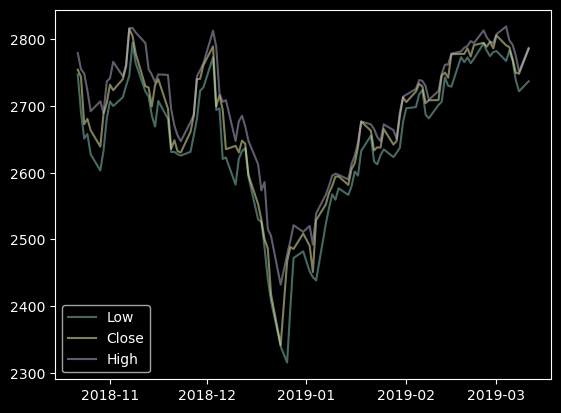

In [ ]:
df = load_test_df()
plot_timeseries(df.Low, df.Close, df.High, add_legend=True)

In [ ]:
#| export
def hist_timeseries(
    *tseries: pd.Series, 
    ax:Optional[Axes]=None
    ) -> None:

    if not isinstance(tseries, tuple):
        tseries = (tseries,)
    ntseries = len(tseries)
    if ax is None:
        fig, axs = plt.subplots(nrows=1, ncols=ntseries, figsize=(5 * ntseries, 4))
        if not isinstance(axs, np.ndarray): # single axis
            axs = (axs,)
    else:
        axs = (ax,)
    for ax, ts in zip(axs, tseries):
        n = ts.shape[0]
        bins = n // 10
        rng = np.random.default_rng()
        z = rng.normal(loc=ts.mean(), scale=ts.std(), size=n)

        ax.hist(ts, bins=bins, histtype='step', label='TS')
        ax.hist(z, bins=bins, histtype='step', label='Gaussian')
        ax.legend()
    plt.show()


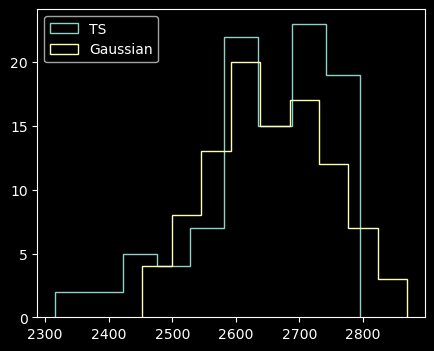

In [ ]:
hist_timeseries(df.Low)

In [ ]:
#| export
def plot_acfs(*tseries, incl_lag0=False, alpha=0.05, ax=None):
    for ts in tseries:
        if ax is None:
            _, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
        else:
            axes = ax
        plot_acf(ts.dropna(), ax=axes[0], zero=incl_lag0, alpha=alpha)
        plot_pacf(ts.dropna(), ax=axes[1], zero=incl_lag0, alpha=alpha)


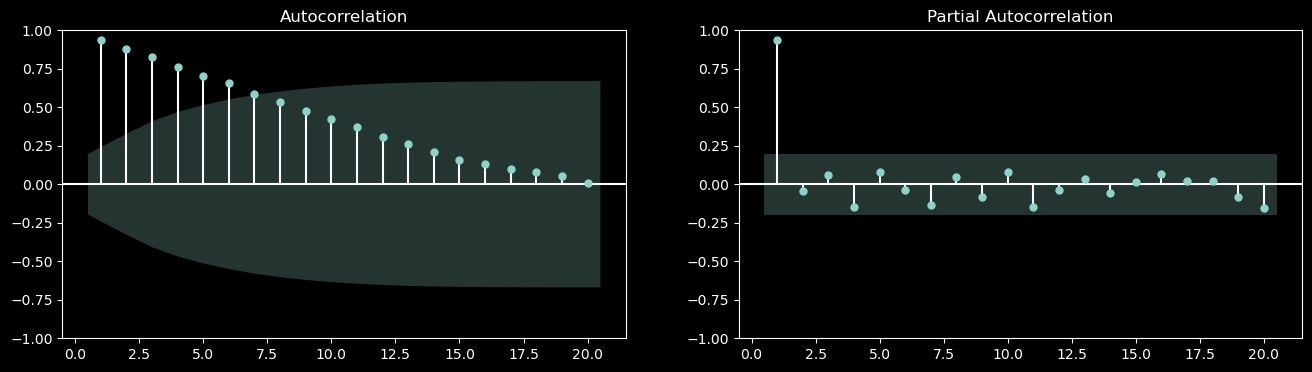

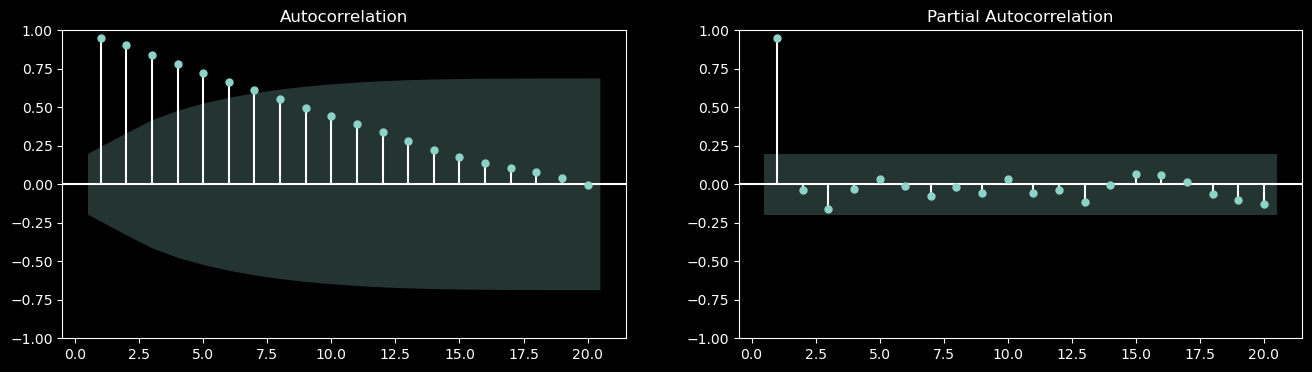

In [ ]:
plot_acfs(df.Close, df.High)

In [ ]:
#| export
def normal_probability_plot(*tseries, ax=None):
    ntseries = len(tseries)
    if not isinstance(tseries, tuple):
        tseries = (tseries,)

    if ax is None:
        fig, axs = plt.subplots(nrows=1, ncols=ntseries, figsize=(5 * ntseries, 4), sharey=True)
        if not isinstance(axs, np.ndarray):
            axs = (axs,)
    else:
        axs = (ax,)

    for ax, ts in zip(axs, tseries):
        (_, (slope, intercept, r)) = stats.probplot(ts, dist='norm', fit=True, plot=ax)
        ax.set_title(f"Normal Probability Plot (R2 = {r:.3f})")

    plt.show()


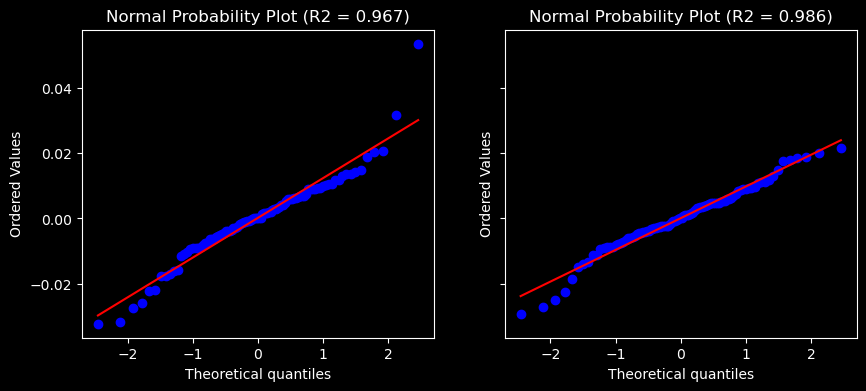

In [ ]:
normal_probability_plot(df.Close.pct_change().dropna(), df.High.pct_change().dropna())

In [ ]:
#| hide
import nbdev
nbdev.nbdev_export()